In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from FeatureEngine.FeatureMethods import FeatureEngine, fuzzy_merge
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
from pathlib import Path
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(Path.cwd())

pathBase = str(Path.cwd())
cv = CountVectorizer()
df = pd.read_csv(pathBase + "\Datasets\TeraSample.csv")
dfOP = pd.read_csv(pathBase + "\Datasets\OpenPmntsVendors.csv")


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.astype('object').describe().transpose())

c:\Users\dylan.levine\Development\HCP Classification\HCP-Classification
                       count  unique                    top    freq
LOGSYS                  2000       1             PEACLNT100    2000
COMP_CODE               2000       2                   1003    1902
COMP_CODE_T             2000       2    Abbott Laboratories    1902
FISCPER                 2000      22                2019005     116
FISCVARNT               2000       1                     K4    2000
AC_LEDGER               2000       1                     0L    2000
AC_DOC_NR               2000    1960             5000145592       4
AC_DOC_LN               2000      51                      2     931
FISCPER3                2000      12                      5     219
PSTNG_DATE              2000     526               20190930      17
CREATEDON               2000     526               20190930      17
CO_AREA                 2000       1                    ABT    2000
PROFIT_CTR              2000      31        

In [2]:
#Define DateEncode as basic features such as day of week, month int, and year int.
#Define groupencode as placing into buckets
#Define mapencode as mapping values to a higher-level grouping

#Define relavent fields to model and their associated data types and feature engineering methods

colDict = {
    "COMP_CODE": {"Type":"Categorical", "Method":"1hot"},
    "REF_KEY1":{"Type":"Categorical", "Method":"1hot"},
    "AC_DOC_NR": {"Type":"ID", "Method":"N/A"},
    "PSTNG_DATE":{"Type":"Date", "Method":"DateEncode"},
    "CREATEDON":{"Type":"Date", "Method":"DateEncode"},
    "DOC_DATE":{"Type":"Date", "Method":"DateEncode"},
    "PROFIT_CTR":{"Type":"Categorical", "Method":"1hot"},
    "AC_DOC_TYP":{"Type":"Categorical", "Method":"1hot"},
    "POST_KEY":{"Type":"Categorical", "Method":"1hot"},
    "CREDITOR":{"Type":"Categorical", "Method":"MapEncode"},
    "NAME":{"Type":"Text", "Method":"Tokenize"},
    "GL_ACCOUNT":{"Type":"Categorical", "Method":"1hot"},
    "CUSTOMER":{"Type":"Categorical", "Method":"MapEncode"},
    "POSTXT":{"Type":"Text", "Method":"Tokenize"},
    "BIC_ZUSERNAM":{"Type":"Categorical", "Method":"MapEncode"},
    "ZBKTXT":{"Type":"Text", "Method":"Tokenize"},
    "ZTCODE":{"TYpe":"Categorical", "Method":"1hot"},
    "DEB_CRE_USD":{"Type":"Numerical", "Method":"GroupEncode"},
    "BIC_ZTERMPAY":{"Type":"Categorical", "Method":"1hot"},
    "MATL_GROUP":{"Type":"Categorical", "Method":"1hot"},
    "ACCNT_GRPV":{"Type":"Categorical", "Method":"1hot"}

}



#Set pandas datatypes for each field
df['COMP_CODE'] = df['COMP_CODE'].astype('object')
df['REF_KEY1'] = df['REF_KEY1'].astype('object')
df['AC_DOC_NR'] = df['AC_DOC_NR'].astype('object')
df['PSTNG_DATE'] = pd.to_datetime(df['PSTNG_DATE'], format="%Y%m%d")
df['CREATEDON'] = pd.to_datetime(df['CREATEDON'].astype('object'), format="%Y%m%d")
df['DOC_DATE'] = pd.to_datetime(df['DOC_DATE'].astype('object'), format="%Y%m%d")
df['PROFIT_CTR'] = df['PROFIT_CTR'].astype('object')
df['AC_DOC_TYP'] = df['AC_DOC_TYP'].astype('object')
df['POST_KEY'] = df['POST_KEY'].astype('object')
df['CREDITOR'] = df['CREDITOR'].astype('object')
df['NAME'] = df['NAME'].astype('object')
df['GL_ACCOUNT'] = df['GL_ACCOUNT'].astype('object')
df['CUSTOMER'] = df['CUSTOMER'].astype('object')
df['POSTXT'] = df['POSTXT'].astype('object')
df['BIC_ZUSERNAM'] = df['BIC_ZUSERNAM'].astype('object')
df['ZBKTXT'] = df['ZBKTXT'].astype('object')
df['ZTCODE'] = df['ZTCODE'].astype('object')
df['DEB_CRE_USD'] = pd.to_numeric(df['DEB_CRE_USD'])
df['BIC_ZTERMPAY'] = df['BIC_ZTERMPAY'].astype('object')
df['MATL_GROUP'] = df['MATL_GROUP'].astype('object')
df['ACCNT_GRPV'] = df['ACCNT_GRPV'].astype('object')



#Filter data for relavent rows
df = df[ (df.POST_KEY == 40) | (df.POST_KEY == 81) | (df.POST_KEY == 96) & (df.GL_ACCOUNT >= 40000000)]

#Get list of relavent fields
colSelect = list(colDict.keys())

df[colSelect]

#df

,COMP_CODE,REF_KEY1,AC_DOC_NR,PSTNG_DATE,CREATEDON,DOC_DATE,PROFIT_CTR,AC_DOC_TYP,POST_KEY,CREDITOR,...,GL_ACCOUNT,CUSTOMER,POSTXT,BIC_ZUSERNAM,ZBKTXT,ZTCODE,DEB_CRE_USD,BIC_ZTERMPAY,MATL_GROUP,ACCNT_GRPV
1,1003,?,5000182043,2019-09-30,2019-09-30,2019-09-30,12262,WE,81,10027697,...,64000101,?,2L ALINITY BTLE VALIDATION 50%,AUTOSYS,?,MB01,13445.19,24,?,Z001
2,1003,EDIINV,5100010932,2020-01-17,2020-01-17,2020-01-16,12259,RE,81,10003556,...,60150101,?,?,AUTOSYS,?,MR1M,1919.60,23,?,Z001
5,1003,?,5000071281,2020-04-16,2020-04-16,2020-04-16,12071,WE,81,10033062,...,51000101,50296854,?,PAWELGS,?,MIGO_GR,348.00,23,Z1-102126,Z001
6,1003,UPLOAD,1900086719,2019-12-30,2019-12-30,2019-10-03,12250,KR,40,30013196,...,64000101,?,?,SHARMSX116,2.02E+13,ZFII_INV_UPD_PGM,187.71,23,?,Z003
7,1003,EDIINV,5100182522,2019-09-13,2019-09-13,2019-09-12,12250,RE,81,10030946,...,60150101,?,?,AUTOSYS,?,MR1M,1115.28,23,?,Z001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1003,?,5000150718,2019-08-08,2019-08-08,2019-08-08,12071,WE,81,10009414,...,51000101,50116128,?,BERGESX6,?,MIGO_GR,980.00,13,Z1-102110,Z001
1989,1003,EDIINV,5100006439,2020-01-11,2020-01-11,2020-01-09,12082,RE,81,10003556,...,60150101,?,?,AUTOSYS,?,MR1M,969.36,23,?,Z001
1993,1003,OCRINV,5100190885,2019-09-26,2019-09-26,2019-09-25,12250,RE,40,30086991,...,53100802,?,?,C_ERP_BRAINW,?,MIRO,112.00,23,?,Z003
1995,1003,OCRINV,5100110476,2019-06-05,2019-06-05,2019-06-03,12071,RE,40,10002390,...,53100802,?,?,C_ERP_BRAINW,?,MIRO,6.20,24,?,Z001


In [3]:
#Clean and transform data
#To consider fuzzy matching vendor names against the complete listing of vendor names on https://openpaymentsdata.cms.gov/dataset/General-Payment-Data-Detailed-Dataset-2019-Reporti/svgu-ws3x

#Replaces all ? with numpy nan val
df = df[colSelect].replace("?", np.nan)

#Creates a feature based off of text with HCP related text
df['BIC_ZUSERNAM'].str.contains('HOSP|MEDIC|HEALTH|POLY|FARMA|PHARMA|DENT|CLINIC|NUTRI|PEDIA|DRUG|LAB|NEURO|DR|NURSE|PHYSICIAN', case=False).replace(True, 1)

#For encoding purposes replaces nans with a related text identifier
df['REF_KEY1'] = df['REF_KEY1'].replace(np.nan, "nan_REF_KEY1")
df['CUSTOMER'] = df['CUSTOMER'].replace(np.nan, "nan_CUSTOMER") #Probablly don't need customer field
df['MATL_GROUP'] = df['MATL_GROUP'].replace(np.nan, "nan_MATL_GROUP")
df['ACCNT_GRPV'] = df['ACCNT_GRPV'].replace(np.nan,"nan_ACCNT_GRPV") 

#Maps each record as either a system or user generated record. Note dialog and not dialog (non-human) is how SAP identifies it
df.loc[df.BIC_ZUSERNAM != "AUTOSYS", 'BIC_ZUSERNAM_BINARY'] = "USER"
df.loc[df.BIC_ZUSERNAM == "AUTOSYS", 'BIC_ZUSERNAM_BINARY'] = "SYSTEM" #USR02 table will help identify whether or not an account is diaglog
df.loc[df.DOC_DATE == np.nan, 'DOC_DATE'] = df['PSTNG_DATE'] # if the doc date is blank then that could be a relvaent feature in and of itself. Technically should always been.

#Counts # of historical transacations a vendor has had in provided dataset
vendorCount = df[['CREDITOR', 'AC_DOC_NR']].groupby(by=['CREDITOR']).count().rename(columns={'AC_DOC_NR':'TransCount'})
df = df.merge(vendorCount, how='left', right_on='CREDITOR',left_on='CREDITOR')

#Regex search of defined HCP "trigger" words
df['TriggerWord'] = df['BIC_ZUSERNAM'].str.contains('HOSP|MEDIC|HEALTH|POLY|FARMA|PHARMA|DENT|CLINIC|NUTRI|PEDIA|DRUG|LAB|NEURO|DR|NURSE|PHYSICIAN', case=False).replace(True, 1)

#Need to map vendors to whether or not the vendor has had an HCP transacation before
#Need to map customers to a group type
#Need to map G/L accounts to whether or not it is a common HCP G/L


#Consolidated feature of various text fields separated by space for future vectorization features.
df['textappend'] = df['NAME'].astype(str) +" "+ df['POSTXT'].astype(str) +" "+ df["ZBKTXT"].astype(str)

#Merge HCP classification records (y values)
#Note: This is random 1's and 0's untill we get the full dataset (will we have multi-class data? (i.e. correct HCP, not correct HCP, correct non-HCP, and not correct non-HCP?))
df['HCPTransacation'] = np.random.randint(2, size=df.shape[0])



(-50000.0, 50000.0)

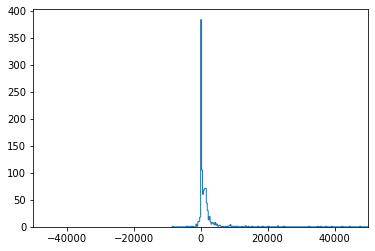

In [4]:
plt.hist(df['DEB_CRE_USD'],bins='auto', histtype='step')
plt.xlim(-50000,50000)

<AxesSubplot:>

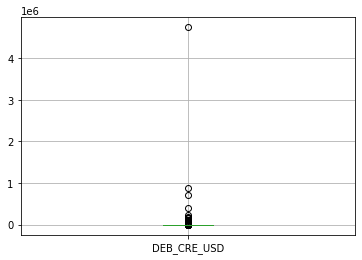

In [5]:
df.boxplot(column=['DEB_CRE_USD'])

In [6]:
modelVals = FeatureEngine(df)

modelVals.oneHotEncodeLabels(["REF_KEY1","PROFIT_CTR","AC_DOC_TYP","POST_KEY","GL_ACCOUNT","ZTCODE", "BIC_ZTERMPAY", "MATL_GROUP", "ACCNT_GRPV"])


#overwrite features to retain after the dfscaled df is called.
modelVals.df['invoiceval'] = modelVals.df['DEB_CRE_USD']
modelVals.df['vendorCount'] = modelVals.df['TransCount']
modelVals.df['HCPWord'] = modelVals.df['TriggerWord']
modelVals.df['HCPClassification'] = modelVals.df['HCPTransacation']


#Vectorizes common words in the model.
#In addition to frequent words we should also specifically get words or phrases that are specific to HCP selections.To also evaluate if we should use TD-IDF vs. standard count vectorizer
#modelVals.concatVector('textappend',1,2,min_df=0.20,max_df=0.90) 


modelVals.df

,COMP_CODE,REF_KEY1,AC_DOC_NR,PSTNG_DATE,CREATEDON,DOC_DATE,PROFIT_CTR,AC_DOC_TYP,POST_KEY,CREDITOR,...,MATL_GROUP_Z1-134170,MATL_GROUP_Z1-182198,MATL_GROUP_nan_MATL_GROUP,ACCNT_GRPV_Z001,ACCNT_GRPV_Z003,ACCNT_GRPV_Z004,invoiceval,vendorCount,HCPWord,HCPClassification
0,1003,nan_REF_KEY1,5000182043,2019-09-30,2019-09-30,2019-09-30,12262,WE,81,10027697,...,0,0,1,1,0,0,13445.19,1,False,0
1,1003,EDIINV,5100010932,2020-01-17,2020-01-17,2020-01-16,12259,RE,81,10003556,...,0,0,1,1,0,0,1919.60,154,False,0
2,1003,nan_REF_KEY1,5000071281,2020-04-16,2020-04-16,2020-04-16,12071,WE,81,10033062,...,0,0,0,1,0,0,348.00,26,False,1
3,1003,UPLOAD,1900086719,2019-12-30,2019-12-30,2019-10-03,12250,KR,40,30013196,...,0,0,1,0,1,0,187.71,1,False,0
4,1003,EDIINV,5100182522,2019-09-13,2019-09-13,2019-09-12,12250,RE,81,10030946,...,0,0,1,1,0,0,1115.28,106,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1003,nan_REF_KEY1,5000150718,2019-08-08,2019-08-08,2019-08-08,12071,WE,81,10009414,...,0,0,0,1,0,0,980.00,15,False,0
1016,1003,EDIINV,5100006439,2020-01-11,2020-01-11,2020-01-09,12082,RE,81,10003556,...,0,0,1,1,0,0,969.36,154,False,0
1017,1003,OCRINV,5100190885,2019-09-26,2019-09-26,2019-09-25,12250,RE,40,30086991,...,0,0,1,0,1,0,112.00,2,False,1
1018,1003,OCRINV,5100110476,2019-06-05,2019-06-05,2019-06-03,12071,RE,40,10002390,...,0,0,1,1,0,0,6.20,24,False,0


In [7]:
#Output features excludes non-features engineered fields and adds the dfscaled property to the object
modelVals.outputFeatures()

#fit_transform method minmaxscales the dfscaled dataset
modelVals.fit_transform()
dftrain = modelVals.dfscaled


dftrain.to_csv(pathBase + "\Datasets\csvoutput.csv")


dftrain

,ACCNT_GRPV_Z001,ACCNT_GRPV_Z003,ACCNT_GRPV_Z004,AC_DOC_TYP_KR,AC_DOC_TYP_RE,AC_DOC_TYP_WE,HCPClassification,HCPWord,MATL_GROUP_124070,MATL_GROUP_124099,...,ZTCODE_MBST,ZTCODE_MIGO_GR,ZTCODE_MIRO,ZTCODE_MR1M,ZTCODE_MR8M,ZTCODE_VL09,ZTCODE_VL32N,ZTCODE_ZFII_INV_UPD_PGM,invoiceval,vendorCount
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004622,0.000000
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.002197,1.000000
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001867,0.163399
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001833,0.000000
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.002028,0.686275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002000,0.091503
1016,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.001998,1.000000
1017,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.001817,0.006536
1018,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.001795,0.150327


In [8]:
#Convert pandas DF to numpy arrays and create test train splits
df_x = dftrain.loc[:, dftrain.columns != 'HCPClassification'].to_numpy()
df_y = dftrain['HCPClassification'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=42)

x_train.shape[0] + x_test.shape[0] == df_x.shape[0] #Assert split is correct

x_train.shape

(765, 56)

In [9]:
#Fit model and test model accuracy on various splits
from sklearn import svm #Import Support Vector Machine model
from sklearn.model_selection import GridSearchCV #For permutating hyperparamaters
from sklearn.model_selection import cross_val_score #Validate against multiple splits

#To implement GridSearch

clf = svm.SVC()
clf.fit(x_train, y_train)
scores = cross_val_score(clf, df_x, df_y, cv=5)
scores

array([0.4754902 , 0.50980392, 0.53431373, 0.45588235, 0.53431373])

In [10]:
clf.predict(x_test)

#Output of predicted classes for given test feature inputs

array([1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0.